# Análise de Dados

Análise de dados, aprendizado de máquina (_Machine Learning_), _Data Science_, Inteligência Artificial. O que tudo isso tem em comum? 

Todas giram em torno de **manipular e transformar dados em informações úteis**, em geral para que nós humanos tomemos decisões melhores. E analisar os dados é a primeira coisa que um profissional dessas carreiras vai fazer. Um Cientista de Dados só conseguirá montar um modelo preditivo de vendas se entender mais dos dados, por exemplo. 

Por isso, vamos começar essa série de aulas conhecendo os dados. E nada mais divertido do que analisar os dados da Copa do Mundo de 2022 no Qatar!


# Jupyter Notebooks

Jupyter Notebooks é uma das ferramentas mais queridinhas de um cientista de dados. Provavelmente o motivo disso é ser um ambiente extremamente versátil, que permite rodar trechos de códigos por partes, criar anotações com detalhes e figuras, imagens dinâmicas que respondem com mouse etc. Ou seja, o inverso do que um terminal comum costuma fazer (rs). 

Se estás com problemas para usá-lo ou precisa instalá-lo, veja detalhes no arquivo `README_VIRTUALENV.md` na raiz deste projeto.

Vamos entender o basicão de notebooks.

## Células

Um notebook é dividido em células, tantas quantas forem necessárias. Cada célula roda um trecho de código, de forma que você pode seguir uma linha de raciocínio enquanto explora os dados. A ideia por trás disso é que, ao fazer análise de dados, precisamos iterar várias vezes, rodar pequenas partes para entender melhor, e ainda manter uma visão cronológica das células em ordem. 

Exercício:
- crie células abaixo desta e as apague. Crie e apague usando a aba superior ou com atalhos.

Os notebooks têm 2 modos de navegação: _ Edit mode and Command mode_. O primeiro é quando você consegue editar o que há nas células; no segundo você navega entre células. Com `Esc` você entra no modo comando (navegação), com `Enter` você entra no modo edição.

Exercício: 
- Fique do modo de comando e navegue pelas células. Depois, entre no modo comando e experimente editar algo nesta célula. Use "Ctrl+Enter" para executar o que há nas células e ver sua alteração.

## Markdowns

A maioria das pessoas que já teve contato com tecnologia já entende como escrever em markdowns, e aqui não é diferente. Use um ou vários `#` para criar títulos em níveis, `-` para bullet points, `>` para citações, entre outras coisas como hyperlinks ([mais detalhes sobre markdowns no jupyter](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)).

Outra grande funcionalidade é escrever equações com LaTeX, muito usada em exatas, como:
$$\vec{F} = m \cdot \vec{a}$$

Exercício:
- Faça uma célula abaixo e treine alguns títulos diferentes, usando um ou vários `#`. Experimente fazer bullet points e identá-los também.

Extra:
- se tiver interesse em saber mais sobre LaTeX, veja um post [resumido aqui](https://www.overleaf.com/learn/latex/Learn_LaTeX_in_30_minutes).

## Bash

Seu amigo terminal não está sozinho. As células aqui podem executar comandos em `bash` através de "comandos mágicos", que são caracteres usados logo no início da célula. No caso do bash, é o `!`:

In [1]:
!ls

'Aula 1 - Análise de Dados.ipynb'   __pycache__


# Chega! Me mostre os dados!

Chega de enrolação. Vamos ver logo os dados da Copa? Afinal, **pra quê** você gostaria de saber o que há de informação sobre os dados da copa? Será que podemos extrair padrões de lá? Entender times fortes, padrões históricos e muito mais?

Toda análise de dados começa vendo os dados. Esses dados são um compilado já feito sobre partidas de futebol em todo o mundo de 1872 a 2022. A fonte dele é o [Kaggle](https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022).

## `pandas`

`pandas` é provavelmente a biblioteca mais usada em ciência de dados, do básico ao avançado. Ela foi criada por _Wes McKinney_ em um fundo de investimentos de 2007 a 2010, sendo liberada para open-source em 2009.


> Dica de ouro #1: não ter medo de ver a implementação das coisas aos poucos! [github do projeto](https://github.com/pandas-dev/pandas) aqui.

> Dica de ouro #2: procurar dúvidas na própria [documentação](https://pandas.pydata.org/docs/), preferencialmente!

Curiosidade: como se vê o primeiro commit de um projeto?

In [2]:
# Resposta
# git log --reverse

In [3]:
import pandas as pd

In [4]:
!ls ../../datasets/predictions

quatar2022_features.csv


In [5]:
!head -n 10 ../../datasets/predictions/quatar2022_features.csv

date,home_team,away_team,tournament,city,country,neutral_location,year,home_team_fifa_rank,home_team_total_fifa_points,home_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_fifa_rank,away_team_total_fifa_points,away_team_goalkeeper_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
2022-11-20,Qatar,Ecuador,FIFA World Cup,Al Khor,Qatar,False,2022,52,1437,,,,,46,1452,71.0,73.5,76.0,74.5
2022-11-21,Senegal,Netherlands,FIFA World Cup,Doha,Qatar,True,2022,20,1584,83.0,79.0,80.7,79.0,10,1658,81.0,85.2,83.0,83.5
2022-11-21,England,Iran,FIFA World Cup,Al Rayyan,Qatar,True,2022,5,1761,83.0,85.0,88.0,84.0,21,1564,73.0,69.0,75.3,69.0
2022-11-21,United States,Wales,FIFA World Cup,Al Rayyan,Qatar,True,2022,15,1633,77.0,75.8,77.7,75.8,18,1588,74.0,75.0,73.0,78.5
2022-11-22,Argentina,Saudi Arabia,FIFA World Cup,Lusail,Qatar,True,2022,4,1765,84.0,82.2,89.0,84.0,49,1444,70.0,72.8,67.7,72.8


In [6]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, squeeze: 'bool | None' = None, prefix: 'str | lib.NoDefault' = <no_default>, mangle_dupe_cols: 'bool' = True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates=None, infer_datetime_format: 'bool' = False, keep_date_col: 'bool' = F

os objetos do pandas tem suas próprias de dados. Tudo começa com `DataFrames` e `Series`.

In [7]:
df = pd.read_csv('../../datasets/fifa_world_cup_2022/fifa_world_cup_2022.csv')

df.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
type(df.date)

pandas.core.series.Series

As `Series` têm diversos tipos de dados também, quase sempre análogos aos tipos básicos do python (mais info [aqui](https://pbpython.com/pandas_dtypes.html)).

> Tipos de dados são importantes. Sem prestar atenção a eles, assim como construção de software, podemos cair em muitos erros!

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

## Perguntas interessantes aos dados

Agora que vimos os dados, conseguimos pensar em como extrair insights deles? 

Aqui vão algumas perguntas, separadas em nível crescente de dificuldade e contexto, e que vão nos ajudar a entender mais desses dados e aprender mais juntos.

### 1. Dados gerais

- Qual o tamanho do dataset?
- Quantos países distintos há nas partidas?
- Quantos anos há de informação?
- Em quantas cidades temos registros de partidas?
- Quantas copas há no dataset?
- O que quer dizer a coluna `neutral_location`? Quantas partidas há em cada caso dessa coluna?
    


###  Qual o tamanho do dataset?

In [11]:
df.shape

(23921, 25)

### Quantos países distintos há nas partidas?

In [12]:
l = df.home_team.to_list() + df.away_team.to_list()
len(set(l))

211

In [13]:
l[:10]

['Bolivia',
 'Brazil',
 'Ecuador',
 'Guinea',
 'Paraguay',
 'Peru',
 'Zimbabwe',
 'Guinea',
 'Faroe Islands',
 'Sweden']

### Quantos anos há de informação?

In [14]:
df['date'] = pd.to_datetime(df.date)
df['year'] = df['date'].dt.year

df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993


In [15]:
print("anos distintos: ", df.year.nunique())
print("min e max de anos: ", df.year.min(), df.year.max())

anos distintos:  30
min e max de anos:  1993 2022


### Em quantas cidades temos registros de partidas?

In [16]:
df.city.nunique()

1576

### Quantas copas há no dataset?

In [17]:
# usando referências de índices para ajudar

df[df.tournament.str.contains("FIFA")].tournament.unique()

array(['FIFA World Cup qualification', 'FIFA World Cup'], dtype=object)

In [18]:
df[df.tournament == 'FIFA World Cup'].year.unique()

array([1994, 1998, 2002, 2006, 2010, 2014, 2018])

### O que quer dizer a coluna `neutral_location`? Quantas partidas há em cada caso dessa coluna?

In [19]:
# Vendo na documentação do dataset, quer dizer
# se os times jogaram em local neutro ou a favor de um deles

# encontra locais onde foi neutro e seleciona colunas
df[df.neutral_location].sample(5)[['date', 'home_team', 'away_team', 'city', 'neutral_location']]

,date,home_team,away_team,city,neutral_location
3061,1998-06-03,Saudi Arabia,Mexico,Créteil,True
21531,2019-09-10,Brazil,Peru,Los Angeles,True
20165,2018-03-23,Senegal,Uzbekistan,Casablanca,True
22661,2021-06-13,Austria,North Macedonia,Bucharest,True
10192,2007-02-06,Nigeria,Ghana,Brentford,True


In [20]:
# encontra locais onde NÂO foi neutro e seleciona colunas
# repare o uso do operador '~'

df[~df.neutral_location].sample(5)[['date', 'home_team', 'away_team', 'city', 'neutral_location']]

,date,home_team,away_team,city,neutral_location
18635,2016-06-04,Rwanda,Mozambique,Kigali,False
2750,1997-11-16,Jamaica,Mexico,Kingston,False
17935,2015-09-06,Chad,Egypt,N'Djamena,False
5096,2000-11-27,Uganda,Djibouti,Kampala,False
21497,2019-09-08,Kenya,Uganda,Nairobi,False


# 2. Investigando mais a fundo

- Encontre as partidas do Brasil vs Alemanha
- Qual o time com mais vitórias? E no torneio da Copa?
- Qual o time menos vitórias? e na Copa?
- Quantos jogos por ano? Quantos torneios por ano?
- Quantos países sediam jogos por ano? Qual país mais sediou jogos? 
- Quais times tem mais ofensa, defesa e meio campo?
- Existem times que nunca se enfrentaram? Se sim, quantas partidas poderiam ser jogadas entre dois times mas nunca foram?

In [21]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  object        
 2   away_team                      23921 non-null  object        
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

### Encontre as partidas do Brasil vs Alemanha

In [23]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993


In [24]:
df.shape

(23921, 26)

In [25]:
l = [1,2,3]

l[2]

3

In [26]:
type(df.neutral_location)

pandas.core.series.Series

In [27]:
df[df['neutral_location']]

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
55,1993-09-22,Mexico,Cameroon,North America,Africa,14,24,0,0,1,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
58,1993-09-22,San Marino,Netherlands,Europe,Europe,119,16,0,0,0,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
67,1993-09-29,Mexico,Poland,North America,Europe,16,22,0,0,0,...,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
72,1993-10-06,Mexico,South Africa,North America,Africa,16,95,0,0,4,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
91,1993-10-15,Korea DPR,Iraq,Asia,Asia,64,59,0,0,3,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23899,2022-06-14,Bahrain,Turkmenistan,Asia,Asia,89,134,1262,1117,1,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
23901,2022-06-14,Myanmar,Singapore,Asia,Asia,152,158,1044,1012,2,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
23905,2022-06-14,Haiti,Guyana,North America,South America,90,174,1261,961,6,...,Win,66.0,51.0,NaN,NaN,63.0,NaN,NaN,NaN,2022
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8,2022


In [28]:
# forma 1
df[
    ( (df.home_team == 'Brazil') & (df.away_team == 'Germany') )
    |
    ( (df.home_team == 'Germany') & (df.away_team == 'Brazil') )
]

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
131,1993-11-17,Germany,Brazil,Europe,South America,4,1,0,0,2,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
2950,1998-03-25,Germany,Brazil,Europe,South America,2,1,0,0,1,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998
3840,1999-07-24,Brazil,Germany,South America,Europe,1,5,0,0,4,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999
6410,2002-06-30,Germany,Brazil,Europe,South America,11,2,0,0,0,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002
8318,2004-09-08,Germany,Brazil,Europe,South America,11,1,0,0,1,...,Draw,94.0,93.0,87.5,82.7,87.5,89.0,92.3,89.8,2004
8990,2005-06-25,Germany,Brazil,Europe,South America,21,1,0,0,2,...,Lose,94.0,93.0,87.5,82.7,87.5,89.0,92.3,89.8,2005
14204,2011-08-10,Germany,Brazil,Europe,South America,3,4,0,0,3,...,Win,86.0,86.0,82.0,83.3,82.2,84.5,84.0,81.8,2011
16931,2014-07-08,Brazil,Germany,South America,Europe,3,2,1242,1299,1,...,Lose,82.0,87.0,84.8,84.0,83.2,84.5,84.7,86.0,2014
20216,2018-03-27,Germany,Brazil,Europe,South America,1,2,1609,1489,0,...,Lose,92.0,83.0,85.8,82.0,87.5,86.8,87.0,83.8,2018


In [29]:
# forma 2

df.query(
    """
     (home_team == 'Brazil' and away_team == 'Germany') or (home_team == 'Germany' and away_team == 'Brazil')
    """
)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
131,1993-11-17,Germany,Brazil,Europe,South America,4,1,0,0,2,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
2950,1998-03-25,Germany,Brazil,Europe,South America,2,1,0,0,1,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998
3840,1999-07-24,Brazil,Germany,South America,Europe,1,5,0,0,4,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999
6410,2002-06-30,Germany,Brazil,Europe,South America,11,2,0,0,0,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002
8318,2004-09-08,Germany,Brazil,Europe,South America,11,1,0,0,1,...,Draw,94.0,93.0,87.5,82.7,87.5,89.0,92.3,89.8,2004
8990,2005-06-25,Germany,Brazil,Europe,South America,21,1,0,0,2,...,Lose,94.0,93.0,87.5,82.7,87.5,89.0,92.3,89.8,2005
14204,2011-08-10,Germany,Brazil,Europe,South America,3,4,0,0,3,...,Win,86.0,86.0,82.0,83.3,82.2,84.5,84.0,81.8,2011
16931,2014-07-08,Brazil,Germany,South America,Europe,3,2,1242,1299,1,...,Lose,82.0,87.0,84.8,84.0,83.2,84.5,84.7,86.0,2014
20216,2018-03-27,Germany,Brazil,Europe,South America,1,2,1609,1489,0,...,Lose,92.0,83.0,85.8,82.0,87.5,86.8,87.0,83.8,2018


In [30]:
df.query(
    """
     (home_team == 'Brazil' and away_team == 'Germany') or (home_team == 'Germany' and away_team == 'Brazil')
    """
).tournament.unique()

array(['Friendly', 'Confederations Cup', 'FIFA World Cup'], dtype=object)

### Qual o time com mais vitórias? E no torneio da Copa?

Entram as agregações!

#### Vendo todos os torneios

In [31]:
# Buscando nos casos de home_team vencer
(
    df
    [df.home_team_result == 'Win']
    .groupby('home_team')
    .count()
    ["date"]
    .sort_values(ascending=False)
)

home_team
USA                         194
Mexico                      190
Brazil                      181
Saudi Arabia                164
Egypt                       163
                           ... 
Turks and Caicos Islands      2
Somalia                       2
Cook Islands                  2
Anguilla                      1
San Marino                    1
Name: date, Length: 211, dtype: int64

In [32]:
# Buscando nos casos de away_team vencer
(
    df
    [df.home_team_result == 'Lose']
    .groupby('away_team')
    .count()
    ["date"]
    .sort_values(ascending=False)
)

away_team
Brazil                   120
Spain                    101
Germany                  101
Zambia                    88
Argentina                 86
                        ... 
Timor-Leste                1
Anguilla                   1
Andorra                    1
American Samoa             1
São Tomé and Príncipe      1
Name: date, Length: 209, dtype: int64

#### Só Copa

In [33]:
# Vendo só copa. Buscando nos casos de home_team vencer
(
    df
    [
        (df.home_team_result == 'Win') 
        & (df.tournament == 'FIFA World Cup')
    ]
    .groupby('home_team')
    .count()
    ["date"]
    .sort_values(ascending=False)
)

home_team
Brazil                    24
Germany                   21
Argentina                 17
France                    14
Netherlands               12
Belgium                   10
Italy                     10
Spain                      9
Portugal                   7
Korea Republic             7
Sweden                     6
England                    5
Russia                     5
Uruguay                    5
Mexico                     4
Colombia                   4
Nigeria                    4
Japan                      3
USA                        3
Croatia                    3
Romania                    3
Chile                      2
Switzerland                2
Bulgaria                   2
South Africa               2
Saudi Arabia               2
Ecuador                    2
Paraguay                   2
Australia                  2
Greece                     2
Côte d'Ivoire              2
Denmark                    1
Norway                     1
Cameroon                   1
Cost

In [34]:
# Vendo só copa. Buscando nos casos de away_team vencer
(
    df
    [(df.home_team_result == 'Lose') & (df.tournament == 'FIFA World Cup')]
    .groupby('away_team')
    .count()
    ["date"]
    .sort_values(ascending=False)
)

away_team
Croatia                10
Spain                   9
Brazil                  8
Germany                 8
Netherlands             7
England                 7
Mexico                  6
France                  6
Uruguay                 5
Denmark                 5
Italy                   5
Switzerland             5
Colombia                4
Argentina               4
Paraguay                3
Costa Rica              3
Ghana                   3
Sweden                  3
Turkey                  3
Senegal                 3
Belgium                 3
Republic of Ireland     2
Romania                 2
Poland                  2
Portugal                2
IR Iran                 2
Nigeria                 2
Japan                   2
Ecuador                 2
USA                     2
Ukraine                 2
Chile                   2
Bulgaria                2
Serbia                  2
Tunisia                 1
Algeria                 1
Slovenia                1
Saudi Arabia            1
Pe

In [35]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993


In [36]:
df.year

0        1993
1        1993
2        1993
3        1993
4        1993
         ... 
23916    2022
23917    2022
23918    2022
23919    2022
23920    2022
Name: year, Length: 23921, dtype: int64

### Desafio

Tente fazer uma análise única que veja os casos de home_team e away_team ao mesmo tempo para gerar uma só lista de vitórias, decrescente.

### Qual o time menos vitórias? e na Copa?

Basta ver os resultados anteriores em ordem ascendente.

### Quantos jogos por ano? Quantos torneios por ano?

In [37]:
(
    df
    .groupby('year')
    .count()
    ['home_team']
)

year
1993     171
1994     494
1995     564
1996     781
1997     797
1998     636
1999     670
2000     993
2001     953
2002     701
2003     851
2004    1016
2005     741
2006     763
2007     910
2008    1034
2009     836
2010     790
2011    1022
2012     927
2013     942
2014     788
2015     938
2016     867
2017     885
2018     830
2019    1075
2020     298
2021    1077
2022     571
Name: home_team, dtype: int64

In [38]:
(
    df
    .groupby('year')
    .agg({
        'tournament': ['nunique', 'count']
    })
)

tournament      
        nunique count
year                 
1993          4   171
1994         16   494
1995         25   564
1996         23   781
1997         23   797
1998         26   636
1999         23   670
2000         26   993
2001         24   953
2002         22   701
2003         24   851
2004         19  1016
2005         19   741
2006         19   763
2007         23   910
2008         22  1034
2009         16   836
2010         19   790
2011         22  1022
2012         22   927
2013         20   942
2014         18   788
2015         17   938
2016         19   867
2017         20   885
2018         17   830
2019         19  1075
2020          4   298
2021         18  1077
2022         10   571

### Quantos países sediam jogos por ano? Qual país mais sediou jogos em um dado ano? 

In [39]:
(
    df
    .groupby(['year', 'country'])
    .count()
)

date  home_team  away_team  home_team_continent  \
year country                                                       
1993 Albania        2          2          2                    2   
     Algeria        1          1          1                    1   
     Argentina      4          4          4                    4   
     Australia      2          2          2                    2   
     Austria        2          2          2                    2   
...               ...        ...        ...                  ...   
2022 Uzbekistan    10         10         10                   10   
     Venezuela      2          2          2                    2   
     Vietnam        3          3          3                    3   
     Wales          5          5          5                    5   
     Zambia         1          1          1                    1   

                 away_team_continent  home_team_fifa_rank  \
year country                                                
1993 Albania                       2                    2   
     Algeria                       1                    1   
     Argentina                     4                    4   
     Australia                     2                    2   
     Austria                       2                    2   
...                              ...                  ...   
2022 Uzbekistan                   10                   10   
     Venezuela                     2                    2   
     Vietnam                       3                    3   
     Wales                         5                    5   
     Zambia                        1                    1   

                 away_team_fifa_rank  home_team_total_fifa_points  \
year country                                                        
1993 Albania                       2                            2   
     Algeria                       1                            1   
     Argentina                     4                            4   
     Australia                     2                            2   
     Austria                       2                            2   
...                              ...                          ...   
2022 Uzbekistan                   10                           10   
     Venezuela                     2                            2   
     Vietnam                       3                            3   
     Wales                         5                            5   
     Zambia                        1                            1   

                 away_team_total_fifa_points  home_team_score  ...  shoot_out  \
year country                                                   ...              
1993 Albania                               2                2  ...          2   
     Algeria                               1                1  ...          1   
     Argentina                             4                4  ...          4   
     Australia                             2                2  ...          2   
     Austria                               2                2  ...          2   
...                                      ...              ...  ...        ...   
2022 Uzbekistan                           10               10  ...         10   
     Venezuela                             2                2  ...          2   
     Vietnam                               3                3  ...          3   
     Wales                                 5                5  ...          5   
     Zambia                                1                1  ...          1   

                 home_team_result  home_team_goalkeeper_score  \
year country                                                    
1993 Albania                    2                           0   
     Algeria                    1                           0   
     Argentina                  4                           0   
     Australia                  2                           0

In [40]:
# vendo qual mais sediou jogos no home_team
(
    df
    .groupby(['year', 'country'])
    .count()
    ['home_team']
    .sort_values(ascending=False)
)

year  country     
1994  USA             89
2006  Germany         84
2010  South Africa    80
2018  Russia          72
1998  France          71
                      ..
2018  Uruguay          1
2006  Lithuania        1
      Liberia          1
      Kenya            1
2022  Zambia           1
Name: home_team, Length: 4543, dtype: int64

### Quais times tem mais ofensa, defesa e meio campo?

Vamos filtrar os dados mais recentes de cada time, usando primeiro um ranking.

In [41]:
df.shape

(23921, 26)

In [42]:
df[(df.home_team == 'Brazil') | (df.away_team == 'Brazil')]

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
14,1993-08-15,Uruguay,Brazil,South America,South America,22,8,0,0,1,...,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
17,1993-08-22,Brazil,Ecuador,South America,South America,8,35,0,0,2,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
23,1993-08-29,Brazil,Bolivia,South America,South America,8,59,0,0,6,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
28,1993-09-05,Brazil,Venezuela,South America,South America,8,94,0,0,4,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23456,2022-02-01,Brazil,Paraguay,South America,South America,2,43,1826,1454,4,...,Win,89.0,72.0,84.8,86.3,85.5,74.2,74.3,76.2,2022
23497,2022-03-24,Brazil,Chile,South America,South America,2,26,1823,1543,4,...,Win,89.0,79.0,84.8,86.3,85.5,75.5,76.7,78.2,2022
23588,2022-03-29,Bolivia,Brazil,South America,South America,76,2,1308,1823,0,...,Lose,70.0,89.0,68.8,68.3,68.8,84.8,86.3,85.5,2022
23686,2022-06-02,Korea Republic,Brazil,Asia,South America,29,1,1519,1832,1,...,Lose,75.0,89.0,73.0,80.0,73.8,84.8,86.3,85.5,2022


In [43]:
df.shape

(23921, 26)

In [44]:
(
    df
    .groupby('home_team')
    .rank(ascending=False)
    ['date']
)

0        126.0
1        233.0
2        146.0
3        103.0
4        121.0
         ...  
23916      1.0
23917      1.0
23918      1.0
23919      1.0
23920      1.0
Name: date, Length: 23921, dtype: float64

In [45]:
df_recent = df.copy()

df_recent['rnk'] = df_recent.groupby('home_team').rank(ascending=False)['date']

# df_recent[(df_recent.home_team == 'Brazil')]

df_recent = df_recent[df_recent.rnk == 1]

In [46]:
df_recent[df_recent.home_team == 'Brazil']

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year,rnk
23497,2022-03-24,Brazil,Chile,South America,South America,2,26,1823,1543,4,...,89.0,79.0,84.8,86.3,85.5,75.5,76.7,78.2,2022,1.0


In [47]:
# Top 10 vendo home team
(
    df_recent
    .sort_values(by='home_team_mean_offense_score', ascending=False)
    [['date','home_team', 'home_team_fifa_rank', 'home_team_mean_offense_score']]
    .head(10)
)

,date,home_team,home_team_fifa_rank,home_team_mean_offense_score
23741,2022-06-05,Argentina,4,89.0
23885,2022-06-13,France,3,88.3
23906,2022-06-14,England,5,88.0
23497,2022-03-24,Brazil,2,86.3
23810,2022-06-09,Portugal,8,86.0
23794,2022-06-08,Belgium,2,85.7
23770,2022-06-07,Italy,6,85.3
23866,2022-06-12,Spain,7,85.0
23909,2022-06-14,Poland,26,84.7
23862,2022-06-11,Uruguay,13,84.3


In [48]:
# Top 10 vendo away team
(
    df_recent
    .sort_values(by='away_team_mean_offense_score', ascending=False)
    [['date','away_team', 'away_team_fifa_rank', 'away_team_mean_offense_score']]
    .head(10)
)

,date,away_team,away_team_fifa_rank,home_team_mean_offense_score
23753,2022-06-06,France,3,76.7
23826,2022-06-10,France,3,77.0
23588,2022-03-29,Brazil,2,68.3
23867,2022-06-12,Portugal,8,76.7
23853,2022-06-11,Belgium,2,73.0
23909,2022-06-14,Belgium,2,84.7
23907,2022-06-14,Italy,6,82.7
23733,2022-06-05,Spain,7,76.7
23794,2022-06-08,Poland,26,85.7
23852,2022-06-11,Germany,12,72.7


O processo é o mesmo para defesa e meio de campo :)

### Existem times que nunca se enfrentaram? Se sim, quantas partidas poderiam ser jogadas entre dois times mas nunca foram?

In [49]:
# Todos os times do dataset
all_teams = set(df.home_team.to_list() + df.away_team.to_list())
len(all_teams)

211

In [50]:
all_teams

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China PR',
 'Chinese Taipei',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo DR',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finlan

In [51]:
# Tuplas que se enfrentaram, mas precisa ordenar pra fazer o set primeiro.

distinct_matches = set(zip(df.home_team, df.away_team))
distinct_matches_sorted = set([tuple(sorted(v)) for v in distinct_matches])

print("Matches not sorted: ", len(distinct_matches))
print("Matches sorted: ", len(distinct_matches_sorted))
# distinct_matches

Matches not sorted:  9011
Matches sorted:  5527


In [52]:
{('Brazil', 'Germany'), ('Germany', 'Brazil')}.issubset(distinct_matches)

True

## Using Math

To use math directly, we'll calculate number of possible permutations without order from original teams and subtract `len(distinct_matches)` from it. 

The number of ways to choose $k=2$ teams from $N=211$ teams is 

$$ \binom{N}{k} = \frac{N!}{(N-k)!k!} = \frac{211!}{(211-2)!2!}=\frac{211!}{209!2!}$$

And then we subtract all matches that happened from it. Calling it $M$ (which values $5527$), the answer is

$$ \frac{N!}{(N-k)k!} - M = \frac{211!}{209!2!} - 5527$$

https://en.wikipedia.org/wiki/Combination



In [53]:
memo ={}
def factorial(n):
    """
    Fectorial using memoization.
    """
    if n in memo:
        return memo[n]
    elif n == 0:
        return 1
    else:
        x = factorial(n-1) * n
        memo[n] = x
        return x

In [54]:
factorial(2) # 2*1

2

In [55]:
factorial(3) # 3*2*1

6

In [56]:
factorial(4) # 4*3*2*1

24

In [57]:
def solution(N, k, games_that_happened):
    return factorial(N) / factorial(N - k) / factorial(k) - games_that_happened

In [58]:
%time

print("matches: ", len(distinct_matches_sorted))
print("teams: ", len(all_teams))

solution(
    N=len(all_teams), 
    k=2, 
    games_that_happened=len(distinct_matches_sorted)
)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
matches:  5527
teams:  211


16628.0


    
# 3. Plots

In [59]:
import matplotlib.pyplot as plt

### Plote o número médio de gols (por partida) por ano

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  object        
 2   away_team                      23921 non-null  object        
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

Text(0, 0.5, 'Gols')

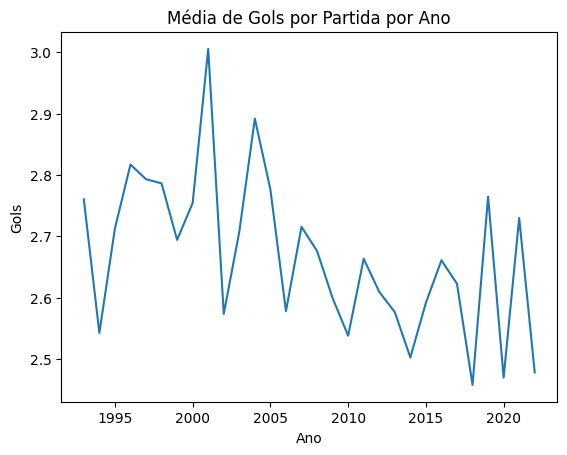

In [61]:
(
    df
    .assign(goals = df['home_team_score'] + df['away_team_score'])
    [['year', 'date', 'home_team', 'away_team', 'home_team_score', 'away_team_score', 'goals']]
    .groupby('year')
    ['goals']
    .mean()
    .plot()
);

plt.title("Média de Gols por Partida por Ano")
plt.xlabel("Ano")
plt.ylabel("Gols")

### Adicione no gráfico anterior o mínimo e máximo de gols por ano

<AxesSubplot: xlabel='year'>

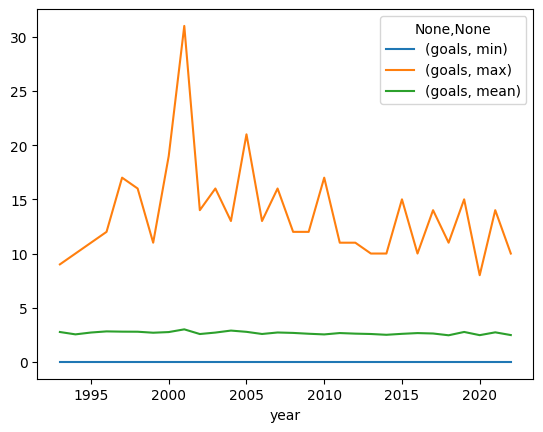

In [62]:
(
    df
    .assign(goals = df['home_team_score'] + df['away_team_score'])
    [['year', 'date', 'home_team', 'away_team', 'home_team_score', 'away_team_score', 'goals']]
    .groupby('year')
    .agg({ # coluna: List[agregacoes]
        'goals': ['min', 'max', 'mean'],
    })
    .plot()
)

# plt.title("Média de Gols por Partida por Ano")
# plt.xlabel("Ano")
# plt.ylabel("Gols")

In [63]:
# https://en.wikipedia.org/wiki/Australia_31%E2%80%930_American_Samoa
(
    df
    .assign(goals = df['home_team_score'] + df['away_team_score'])
    .query("goals >= 30")
    .T
)

,5410
date,2001-04-11 00:00:00
home_team,Australia
away_team,American Samoa
home_team_continent,Oceania
away_team_continent,Oceania
home_team_fifa_rank,77
away_team_fifa_rank,203
home_team_total_fifa_points,0
away_team_total_fifa_points,0
home_team_score,31


### Plote o número de times em partidas por ano

In [64]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993


In [65]:
# year  team
# 1992  Brazil
# 1998  Germany
# ...
 
def matches_per_year(df):
    df_home = df[['home_team', 'year']].rename(columns={'home_team': 'team'})
    df_away = df[['away_team', 'year']].rename(columns={'away_team': 'team'})
    
    df_team = pd.concat([df_home, df_away], axis=0).reset_index(drop=True)
    
    print("df_home: ", len(df_home))
    print("df_away: ", len(df_away))
    print("df_team: ", len(df_team))
    
    return df_team

In [66]:
df_team = matches_per_year(df)
df_team

df_home:  23921
df_away:  23921
df_team:  47842


,team,year
0,Bolivia,1993
1,Brazil,1993
2,Ecuador,1993
3,Guinea,1993
4,Paraguay,1993
...,...,...
47837,Andorra,2022
47838,Latvia,2022
47839,Ghana,2022
47840,Tunisia,2022


In [67]:
23921 * 2

47842

<AxesSubplot: xlabel='year'>

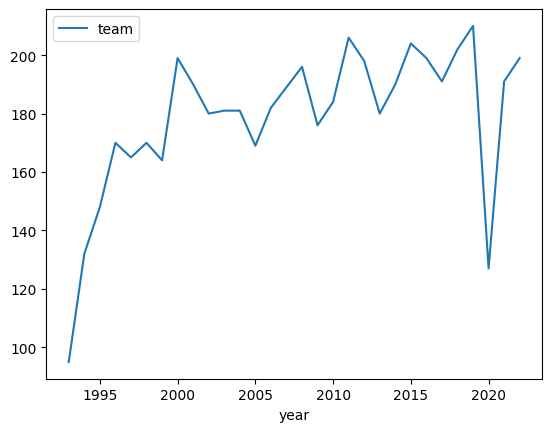

In [68]:
(
    df_team
    .groupby("year")
    .nunique()
    .plot()
)

### Plote o Ranking da FIFA do Brasil e Argentina por ano

Vamos calcular os ranking como uma média para cada time por ano.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  object        
 2   away_team                      23921 non-null  object        
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

In [91]:
import re

def get_team_normalized(df, team: str):
    """
    Dado um time 'team', procura as partidas desse time no dataframe 'df'
    tanto quando ele jogou como 'home_team' como 'away_team', normaliza os
    nomes das colunas para não ter diferença entre home/away.
    Args:
        df: pandas DataFrame com os dados de todas as partidas
        team: time para pesquisar.
    Returns:
        Um novo dataframe só com partidas do time 'team'.
    """
    
    home_cols = [c for c in df.columns if 'home' in c]
    away_cols = [c for c in df.columns if 'away' in c]
    
    df_home = (
        df
        [(df.home_team == team)]
        [[c for c in df.columns if c not in away_cols]]
        .rename(columns=lambda x: re.sub('home_', '', x))
    )
    
    df_away = (
        df
        [(df.away_team == team)]
        [[c for c in df.columns if c not in home_cols]]
        .rename(columns=lambda x: re.sub('away_', '', x))
    )
    
    df_team_normalized = pd.concat([df_home, df_away], axis=0).reset_index(drop=True)
    
    return df_team_normalized

In [92]:
df_brazil = get_team_normalized(df, team='Brazil')

df_brazil

,date,team,team_continent,team_fifa_rank,team_total_fifa_points,team_score,tournament,city,country,neutral_location,shoot_out,team_result,team_goalkeeper_score,team_mean_defense_score,team_mean_offense_score,team_mean_midfield_score,year
0,1993-08-08,Brazil,South America,8,0,1,Friendly,Maceió,Brazil,False,No,Draw,NaN,NaN,NaN,NaN,1993
1,1993-08-22,Brazil,South America,8,0,2,FIFA World Cup qualification,São Paulo,Brazil,False,No,Win,NaN,NaN,NaN,NaN,1993
2,1993-08-29,Brazil,South America,8,0,6,FIFA World Cup qualification,Recife,Brazil,False,No,Win,NaN,NaN,NaN,NaN,1993
3,1993-09-05,Brazil,South America,8,0,4,FIFA World Cup qualification,Belo Horizonte,Brazil,False,No,Win,NaN,NaN,NaN,NaN,1993
4,1993-09-19,Brazil,South America,8,0,2,FIFA World Cup qualification,Rio de Janeiro,Brazil,False,No,Win,NaN,NaN,NaN,NaN,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,2021-11-16,Brazil,South America,2,1820,0,FIFA World Cup qualification,San Juan,Argentina,False,No,NaN,89.0,84.8,86.3,85.5,2021
429,2022-01-27,Brazil,South America,2,1826,1,FIFA World Cup qualification,Quito,Ecuador,False,No,NaN,89.0,84.8,86.3,85.5,2022
430,2022-03-29,Brazil,South America,2,1823,4,FIFA World Cup qualification,La Paz,Bolivia,False,No,NaN,89.0,84.8,86.3,85.5,2022
431,2022-06-02,Brazil,South America,1,1832,5,Friendly,Seoul,Korea Republic,False,No,NaN,89.0,84.8,86.3,85.5,2022


In [72]:
df_brazil_yearly = (
    df_brazil
    .groupby('year')
    ['fifa_rank']
    .mean()
    .reset_index()
)

df_brazil_yearly.tail(10)

,year,fifa_rank
20,2013,16.157895
21,2014,4.357143
22,2015,5.923077
23,2016,5.909091
24,2017,1.636364
25,2018,2.666667
26,2019,2.875000
27,2020,3.000000
28,2021,2.562500
29,2022,1.666667


In [73]:
df_argentina = get_team_normalized(df, team='Argentina')
df_argentina

,team,year,fifa_rank
0,Argentina,1993,5
1,Argentina,1993,5
2,Argentina,1993,5
3,Argentina,1993,9
4,Argentina,1993,9
...,...,...,...
362,Argentina,2021,6
363,Argentina,2021,6
364,Argentina,2022,5
365,Argentina,2022,4


In [74]:
df_argentina_yearly = (
    df_argentina
    .groupby('year')
    ['fifa_rank']
    .mean()
    .reset_index()
)

df_argentina_yearly.tail(10)

,year,fifa_rank
20,2013,3.000000
21,2014,4.000000
22,2015,2.454545
23,2016,1.142857
24,2017,2.800000
25,2018,7.769231
26,2019,10.466667
27,2020,8.500000
28,2021,7.125000
29,2022,4.333333


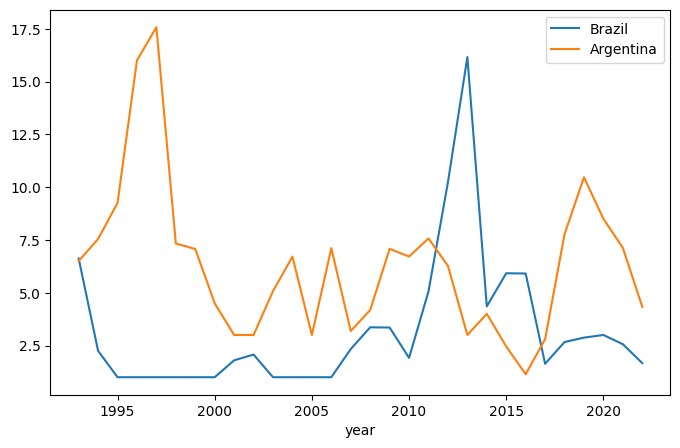

In [76]:
f, ax = plt.subplots(figsize=(8,5))

df_brazil_yearly.plot(x='year', y='fifa_rank', ax=ax, label='Brazil')
df_argentina_yearly.plot(x='year', y='fifa_rank', ax=ax, label='Argentina');

### Plote o ataque, defesa e meio de campo do Brasil e Argentina por ano

Vamos plotar separadamente ataque, depois defesa e por último meio de campo, sempre comparando Brazil com Argentina.

In [77]:
# TODO DOS TECOS

# 3. Estatística

#### Distribuições e Histogramas

#### Correlações
- O que é uma distribuição de dados? 
- Como é a distribuição de gols por jogo nos jogos do Brasil? Muda se for home_team? ou away_team?
- Como é a mesma distribuição para todos os jogos de Copas?
- Como podemos ver distribuição de placares de jogos?

### Como é a distribuição de gols por jogo nos jogos do Brasil?

In [93]:
df_brazil = get_team_normalized(df, 'Brazil')
df_brazil.head()

,date,team,team_continent,team_fifa_rank,team_total_fifa_points,team_score,tournament,city,country,neutral_location,shoot_out,team_result,team_goalkeeper_score,team_mean_defense_score,team_mean_offense_score,team_mean_midfield_score,year
0,1993-08-08,Brazil,South America,8,0,1,Friendly,Maceió,Brazil,False,No,Draw,NaN,NaN,NaN,NaN,1993
1,1993-08-22,Brazil,South America,8,0,2,FIFA World Cup qualification,São Paulo,Brazil,False,No,Win,NaN,NaN,NaN,NaN,1993
2,1993-08-29,Brazil,South America,8,0,6,FIFA World Cup qualification,Recife,Brazil,False,No,Win,NaN,NaN,NaN,NaN,1993
3,1993-09-05,Brazil,South America,8,0,4,FIFA World Cup qualification,Belo Horizonte,Brazil,False,No,Win,NaN,NaN,NaN,NaN,1993
4,1993-09-19,Brazil,South America,8,0,2,FIFA World Cup qualification,Rio de Janeiro,Brazil,False,No,Win,NaN,NaN,NaN,NaN,1993


Text(0.5, 1.0, 'Histograma de Gols por Partida do Brasil')

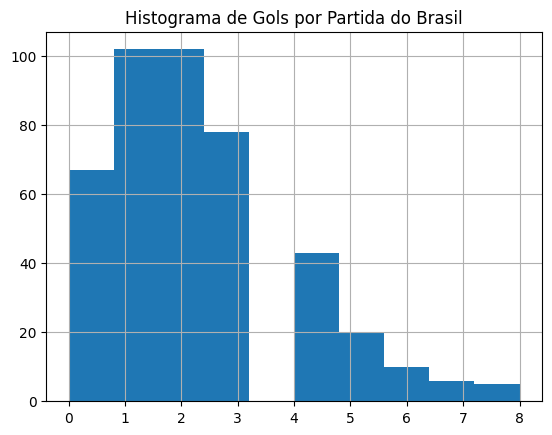

In [97]:
df_brazil.hist('team_score');
plt.title("Histograma de Gols por Partida do Brasil")

In [99]:
(
    df_brazil
    .groupby('team_score')
    ['team']
    .count()
)

team_score
0     67
1    102
2    102
3     78
4     43
5     20
6     10
7      6
8      5
Name: team, dtype: int64

A distribuição de jogos é tipicamente descrita como uma distribuição de [Poisson](https://allendowney.github.io/ThinkBayes2/chap08.html#poisson-processes).

### Muda se for home_team? ou away_team?

<AxesSubplot: >

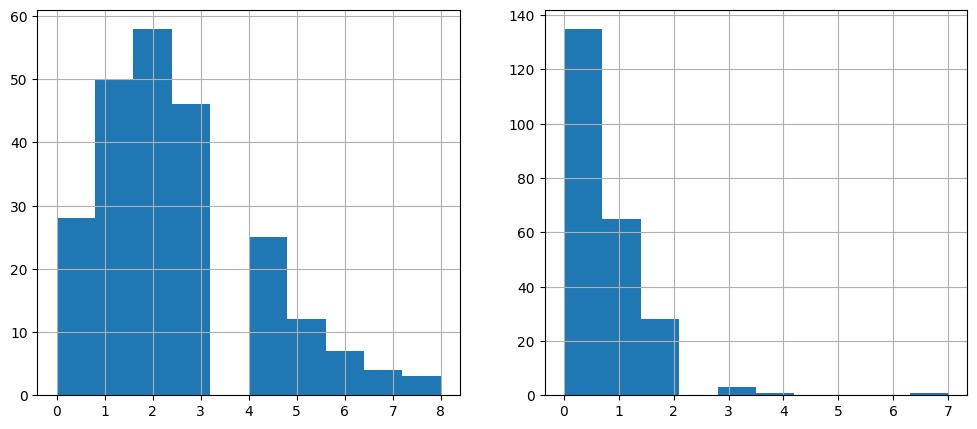

In [115]:
f, axs = plt.subplots(1,2,figsize=(12,5))

(
    df
    [(df.home_team == 'Brazil')]
    ['home_team_score']
    .hist(ax=axs[0])
)

(
    df
    [(df.home_team == 'Brazil')]
    ['away_team_score']
    .hist(ax=axs[1])
)

### Como é a mesma distribuição para todos os jogos de Copas?

In [128]:
home_scores = df.home_team_score
away_scores = df.away_team_score

print('home_scores rows: ', len(home_scores))
print('away_scores rows: ', len(away_scores))

scores = pd.concat([home_scores, away_scores], axis=0).reset_index(drop=True)
print('scores rows: ', len(scores))

scores

home_scores rows:  23921
away_scores rows:  23921
scores rows:  47842


0        3
1        1
2        5
3        1
4        1
        ..
47837    1
47838    2
47839    0
47840    3
47841    1
Length: 47842, dtype: int64

In [129]:
type(scores)

pandas.core.series.Series

<AxesSubplot: >

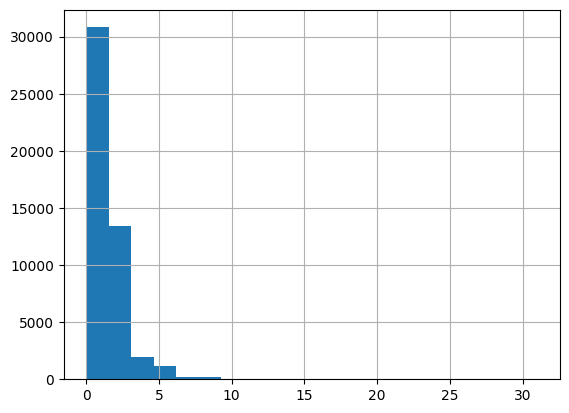

In [132]:
scores.hist(bins=20)

In [136]:
scores.name = 'score'
scores.name

'score'

<AxesSubplot: xlabel='score'>

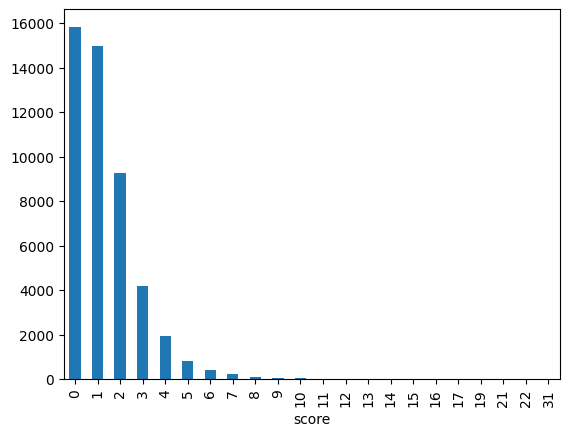

In [155]:
(
    scores
    .to_frame()
    .reset_index()
    .groupby("score")
    ['index']
    .count()
    .plot(kind='bar')
)

### Como podemos ver distribuição de placares de jogos?

In [158]:
df[['home_team_score', 'away_team_score']].head()

,home_team_score,away_team_score
0,3,1
1,1,1
2,5,0
3,1,0
4,1,3


<AxesSubplot: ylabel='placar_nao_ordenado'>

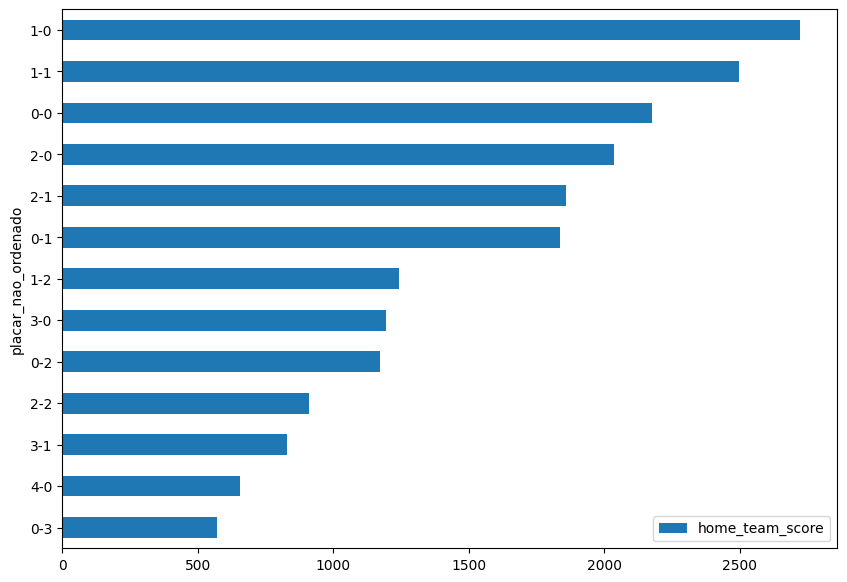

In [201]:
(
    df
    [['home_team_score', 'away_team_score']]
    .assign(placar_nao_ordenado = df['home_team_score'].astype(str) + '-' + df['away_team_score'].astype(str))
    .groupby("placar_nao_ordenado")
    .count()
    ['home_team_score']
    .reset_index()
    .query('home_team_score >= 500')
    .sort_values(by='home_team_score')
    .set_index('placar_nao_ordenado')
    .plot(kind='barh', figsize=(10,7))
)

# 4. Previsões
- Pense e escreva uma estratégia para prever vencedores de partidas na Copa de 2022. O que você levaria em conta? Quais as limtações? 
- Use sua estratégia para prever os finalistas da fase de grupos de 2022
- Faça uma estratégia simples para prever o vencedor da Copa de 2022